# Juego de suma 0 entre 2 personas

## Matriz de pagos: es lo que B tiene que pagar a A en cada caso
|a/b|  1|  2|  3|
|--|--|--|--| 
|1|    3|  2| -3|
|2|   0| -4| 6|
|3|    0| -5|  5|

## Cual es el valor esperado del pago que B hará al jugador A ?
Probabilidades de A  1(2/3) 2(1/3) 3 (0)
Probabilidades de B  1(0)   2(3/5) 3 (2/5)

Se tienen 3 opciones a elegir (1,2,3) por cada jugador
Existen 9 combinaciones posibles, pero no todas aplican, así que la matriz quedaría:

Nueva matriz de pagos: es lo que B tiene que pagar a A en cada caso

|a/b|  1|  2|  3|
|--|--|--|--| 
|1    |0|  2| -3|
|2    |0| -4|  6|
|3    |0|  0|  0|

Quedamos con solo 4 opciones (A,B) (1,2) (1,3) (2,2) (2,3)

In [1]:
payments = {
    "12":2,
    "13":-3,
    "22":-4,
    "23":6
    }

In [2]:
# Selecciones de cada jugador segun su probabilidad

options_a = [1,1,2]
options_b = [2,2,2,3,3]

In [3]:
# funciones

import random
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format

list_union = [] # Union de valores obtenidos

def randomizer(test_number):
    for num in range(0, test_number):
        randNumber_a = random.randint(0, 2)
        randNumber_b = random.randint(0, 4)
        selected_a = options_a[randNumber_a]
        selected_b = options_b[randNumber_b]
        list_union.append(str(selected_a)+str(selected_b))
    return list_union

def paymentSum(resultList,payments):
    totalPayment = 0
    list_payments = []
    for i in resultList:
        totalPayment += payments[i]
        list_payments.append(payments[i])
    return totalPayment, list_payments

In [48]:
#test
test_number = 500000
resultList = randomizer(test_number)
totalPayment, list_payments = paymentSum(resultList, payments)
paymentPerPlay = totalPayment/test_number

print(f'El promedio de pago por cada juego (jugando {test_number} veces) es de {paymentPerPlay}')


El promedio de pago por cada juego (jugando 500000 veces) es de -0.010418


## Vemos que el promedio por juego tiende a ser 0

# Calculo los limites para que el valor de pago obtenido esté dentro de la campana con un valor de confianza del 90 % (+-1.645)

(array([ 999871., 1333218.,       0.,       0.,       0.,       0.,
        1999927.,       0.,       0.,  666984.]),
 array([-4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.]),
 <BarContainer object of 10 artists>)

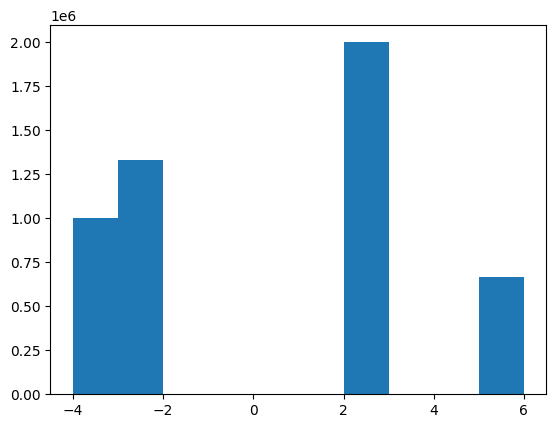

In [8]:
import matplotlib.pyplot as plt
plt.hist(list_payments)

## Si corro solo 1 juego Solo obtengo 4 valores de pago
## Correré un juego 5000 veces, varias veces para así poder obtener 50 datos de pago total diferentes

In [52]:
#test multiple
plays_number = 6
test_number = 15000

total_payments_in_mult_games = []

for i in range(1,plays_number):
    resultList = randomizer(test_number)
    totalPayment, list_payments = paymentSum(resultList, payments)
    paymentPerPlay = totalPayment/test_number
    total_payments_in_mult_games.append(paymentPerPlay)


(array([1., 0., 0., 0., 1., 0., 0., 0., 0., 3.]),
 array([0.08926667, 0.09306667, 0.09686667, 0.10066667, 0.10446667,
        0.10826667, 0.11206667, 0.11586667, 0.11966667, 0.12346667,
        0.12726667]),
 <BarContainer object of 10 artists>)

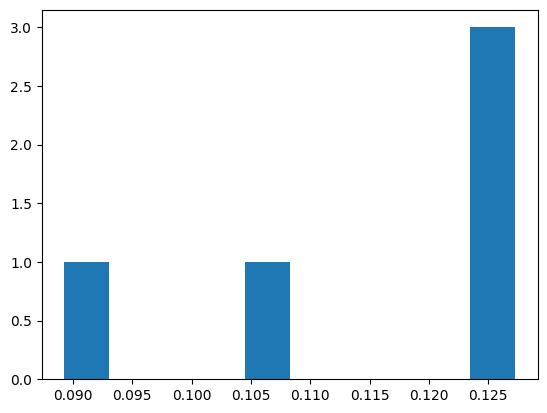

In [53]:
plt.hist(total_payments_in_mult_games)